# K-Means on digits

In [2]:
import sys
sys.path.append('../_PyUtilFcts/')
import UtilsPredictionResults as upr

import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits

 Dataset loaded!  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
     - digits.data.shape (1797, 64)
     - nrCls 10
 Labels,  10  classes:  [0 1 2 3 4 5 6 7 8 9]


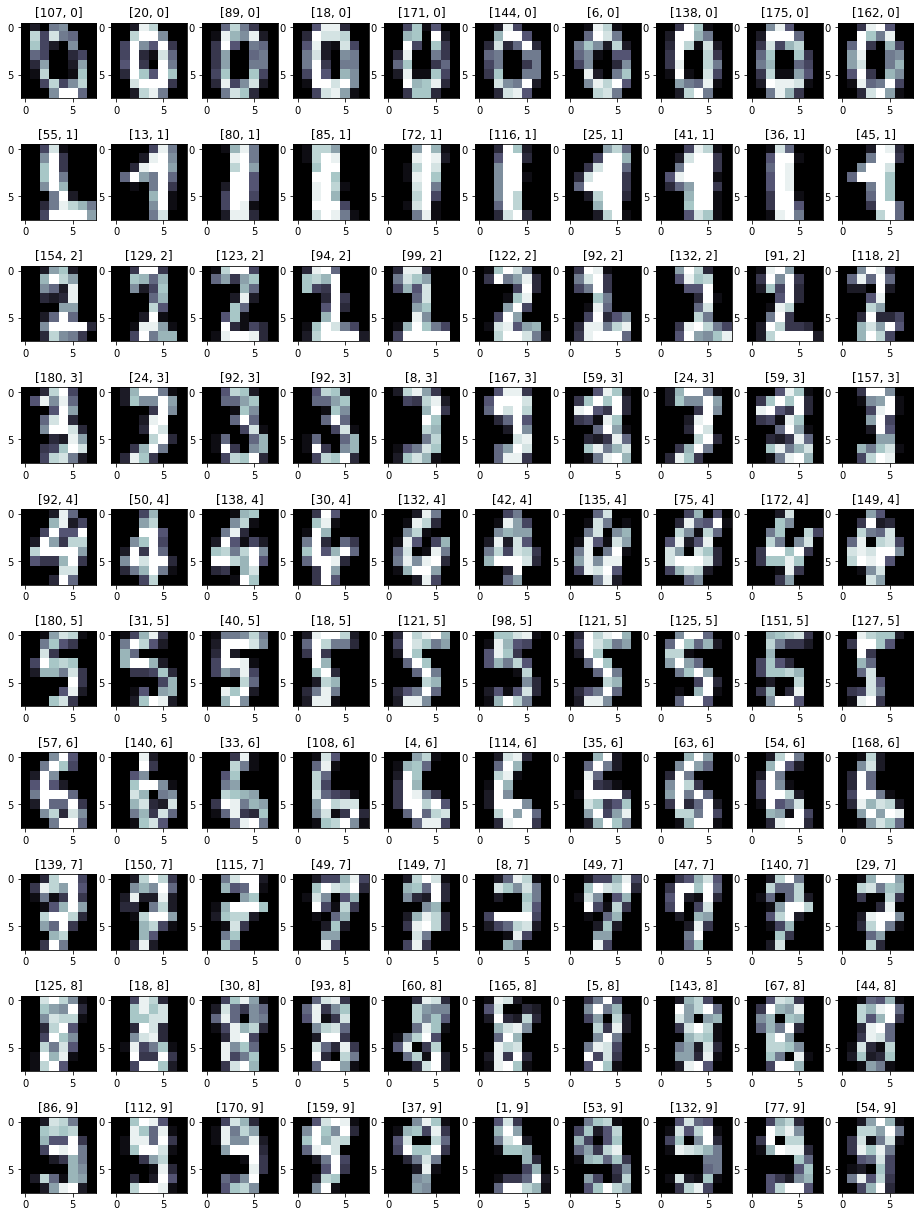

In [3]:
dsXy = load_digits()

print(' Dataset loaded! ', dsXy.keys())
print('     - digits.data.shape', dsXy.data.shape)


if ('target_names' in dsXy.keys()): target_names = dsXy.target_names
else: target_names = np.unique(dsXy.target).astype(str);

nrCls = len(target_names);
print('     - nrCls', nrCls)
# Afisare set de date 
upr.ImageIllustrationOriginalDataSet(dsXy.images, dsXy.target, target_names)

 KMeans - cluster centers
     - kmeans.cluster_centers_.shape (10, 64)
     - digits.images.shape (1797, 8, 8)


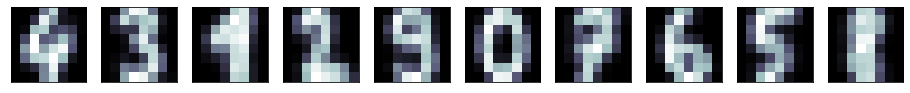

In [8]:
# Aplicare KMeans
# n_clusters = 10
n_clusters = max(nrCls, 10)
kmeans = KMeans(n_clusters, random_state=0)
clusters = kmeans.fit_predict(dsXy.data)
print(' KMeans - cluster centers')
print('     - kmeans.cluster_centers_.shape', kmeans.cluster_centers_.shape)

 # Afisare centrelor claselor KMeans
if ('images' in dsXy.keys()): 
    print('     - digits.images.shape', dsXy.images.shape)
    centers_image = kmeans.cluster_centers_.reshape(n_clusters, dsXy.images.shape[1], dsXy.images.shape[2])
    
    fig, ax = plt.subplots(1, n_clusters, figsize=(n_clusters*1.6, 3))
    
    for axi, center in zip(ax.flat, centers_image):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, cmap=plt.cm.bone)

accuracy:  0.7952142459654981
Confusion matrix, without normalization


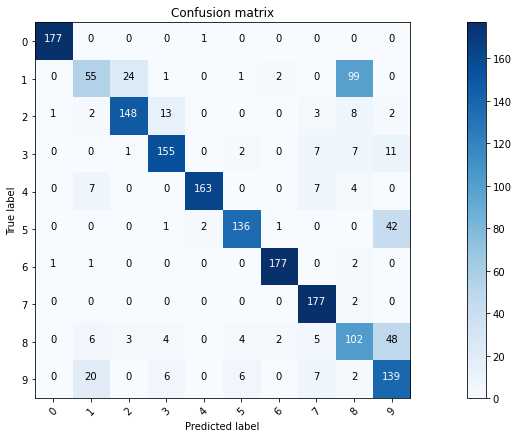

    Classification report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.60      0.30      0.40       182
           2       0.84      0.84      0.84       177
           3       0.86      0.85      0.85       183
           4       0.98      0.90      0.94       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.45      0.59      0.51       174
           9       0.57      0.77      0.66       180

    accuracy                           0.80      1797
   macro avg       0.80      0.80      0.79      1797
weighted avg       0.81      0.80      0.79      1797



In [9]:
from scipy.stats import mode

# se coreleaza labelurile returnate de KMeans cu cele reale
labels = np.zeros_like(clusters)
for i in range(n_clusters):
    mask = (clusters == i)
    labels[mask] = mode(dsXy.target[mask])[0] # returneaza cele mai frecvente valori dintr-un vector

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print( "accuracy: ", accuracy_score(dsXy.target, labels))
cm = confusion_matrix(dsXy.target, labels)
fig = plt.figure(figsize=(16, 6))
upr.ImagePlotConfusionMatrix(cm, target_names)
print('    Classification report: \n\n', classification_report(dsXy.target, labels))

accuracy:  0.9371174179187535
Confusion matrix, without normalization


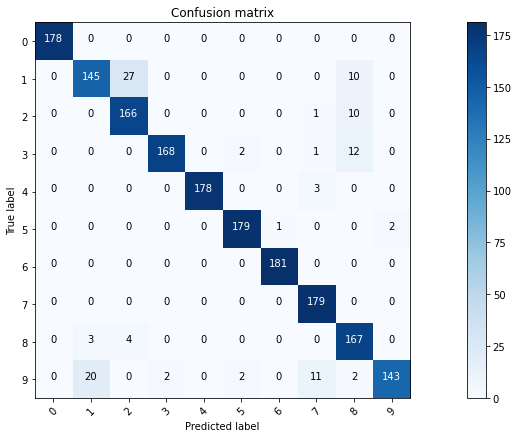

    Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.86      0.80      0.83       182
           2       0.84      0.94      0.89       177
           3       0.99      0.92      0.95       183
           4       1.00      0.98      0.99       181
           5       0.98      0.98      0.98       182
           6       0.99      1.00      1.00       181
           7       0.92      1.00      0.96       179
           8       0.83      0.96      0.89       174
           9       0.99      0.79      0.88       180

    accuracy                           0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797



In [6]:

from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
dsXy_proj = tsne.fit_transform(dsXy.data)

# Compute the clusters
kmeans = KMeans(n_clusters, random_state=0)
clusters = kmeans.fit_predict(dsXy_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(dsXy.target[mask])[0]

# Compute the accuracy
print( "accuracy: ", accuracy_score(dsXy.target, labels))
cm = confusion_matrix(dsXy.target, labels)
fig = plt.figure(figsize=(16, 6))
upr.ImagePlotConfusionMatrix(cm, target_names)
print('    Classification report: \n\n', classification_report(dsXy.target, labels))